<a href="https://colab.research.google.com/github/fleshgordo/cocreate22/blob/main/002_scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scraping data from the web

In this exercise we will work with the [xeno-canto](https://xeno-canto.org/) archive of bird recordings. 

### Requirements

- Download and install [Insomnia](https://insomnia.rest/download). It's a tool that helps to quickly test an [API](https://en.wikipedia.org/wiki/API#Web_APIs) on the web.

A basic search URL looks like:

````
https://www.xeno-canto.org/api/2/recordings?
 
````

As described in the [API documentation](https://xeno-canto.org/explore/api) you can pass several parameters in order to filter your search. This parameters are added to the end of the URL as shown in the screenshot from Insomnia:

![alt text](https://github.com/fleshgordo/cocreate22/raw/main/img/insomnia_query.jpg "Title")

The URL looks like this:
````
https://www.xeno-canto.org/api/2/recordings?query=sparrow
 
````

The response to this query is in the format of JavaScript Object Notation (JSON). One can observer the number of Recordings (16488 in total) and the number of species (125). 

The entry recordings is a list that contains all recordings related to the search.

Furter query parameters (such as time, geolocation, search terms) are possible. For

## Scraping data with python 

First we are importing some addtional python packages which we will use for this scraping exercise.

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import mplleaflet

# scrape from xeno-canto

In [ ]:
#params= "cnt:'brazil'"
params = "cnt:switzerland loc:lausanne"
url="https://www.xeno-canto.org/api/2/recordings?query="+params
print(url)

r=requests.get(url, headers={"Content-Type":"json"})
resp = r.json()
print(resp)

https://www.xeno-canto.org/api/2/recordings?query=cnt:switzerland loc:lausanne
{'numRecordings': '29', 'numSpecies': '18', 'page': 1, 'numPages': 1, 'recordings': [{'id': '348215', 'gen': 'Cygnus', 'sp': 'olor', 'ssp': '', 'en': 'Mute Swan', 'rec': 'brickegickel', 'cnt': 'Switzerland', 'loc': 'Lausanne, Lausanne, Vaud', 'lat': '46.5171', 'lng': '6.5873', 'alt': '380', 'type': 'call', 'url': '//xeno-canto.org/348215', 'file': 'https://xeno-canto.org/348215/download', 'file-name': 'XC348215-161225_15HoeckerschwanXC.mp3', 'sono': {'small': '//xeno-canto.org/sounds/uploaded/MCFGTDXKHO/ffts/XC348215-small.png', 'med': '//xeno-canto.org/sounds/uploaded/MCFGTDXKHO/ffts/XC348215-med.png', 'large': '//xeno-canto.org/sounds/uploaded/MCFGTDXKHO/ffts/XC348215-large.png', 'full': '//xeno-canto.org/sounds/uploaded/MCFGTDXKHO/ffts/XC348215-full.png'}, 'lic': '//creativecommons.org/licenses/by-nc-sa/4.0/', 'q': 'C', 'length': '0:10', 'time': '09:00', 'date': '2016-12-25', 'uploaded': '2016-12-28', 'al

In [ ]:
#print(resp.keys())
#print(len(resp["recordings"]))
#for item in resp["recordings"]:
#  print(item)
df = pd.DataFrame.from_dict(resp["recordings"])
display(df)
#ef = df.loc[df["en"] == "Greater Rhea"]
#display(ef)

,id,gen,sp,ssp,en,rec,cnt,loc,lat,lng,...,lic,q,length,time,date,uploaded,also,rmk,bird-seen,playback-used
0,348215,Cygnus,olor,,Mute Swan,brickegickel,Switzerland,"Lausanne, Lausanne, Vaud",46.5171,6.5873,...,//creativecommons.org/licenses/by-nc-sa/4.0/,C,0:10,09:00,2016-12-25,2016-12-28,[Corvus corone],eine Gruppe vorbeischwimmend,yes,no
1,348332,Cygnus,olor,,Mute Swan,brickegickel,Switzerland,"Lausanne, Lausanne, Vaud",46.5171,6.5875,...,//creativecommons.org/licenses/by-nc-sa/4.0/,E,0:01,08:30,2016-12-25,2016-12-29,[],,yes,no
2,348206,Netta,rufina,,Red-crested Pochard,brickegickel,Switzerland,"Lausanne, Lausanne, Vaud",46.5169,6.5861,...,//creativecommons.org/licenses/by-nc-sa/4.0/,B,0:06,08:00,2016-12-25,2016-12-28,[],"there where Tufted duck, Red-crested pochard, ...",no,no
3,517426,Aythya,ferina,,Common Pochard,brickegickel,Switzerland,"Lausanne, Lausanne, Vaud",46.5178,6.5886,...,//creativecommons.org/licenses/by-nc-sa/4.0/,B,0:04,10:00,2020-01-04,2020-01-05,[],high pass filter,yes,no
4,517429,Aythya,ferina,,Common Pochard,brickegickel,Switzerland,"Lausanne, Lausanne, Vaud",46.5178,6.5886,...,//creativecommons.org/licenses/by-nc-sa/4.0/,C,0:05,10:00,2020-01-04,2020-01-05,[],high pass filter,yes,no
5,517428,Aythya,ferina,,Common Pochard,brickegickel,Switzerland,"Lausanne, Lausanne, Vaud",46.5178,6.5886,...,//creativecommons.org/licenses/by-nc-sa/4.0/,C,0:05,10:00,2020-01-04,2020-01-05,[],"high pass filter, Feld- oder Hausserpling im H...",yes,no
6,398650,Bucephala,clangula,,Common Goldeneye,brickegickel,Switzerland,"Lausanne, Lausanne, Vaud",46.5179,6.5847,...,//creativecommons.org/licenses/by-nc-sa/4.0/,B,0:01,11:00,2018-01-06,2018-01-07,[],"ca. 10 Balzende Enten auf dem See, sunny day, ...",yes,no
7,694124,Bucephala,clangula,,Common Goldeneye,brickegickel,Switzerland,"Lausanne, Lausanne District, Vaud",46.5175,6.5886,...,//creativecommons.org/licenses/by-nc-sa/4.0/,C,0:01,10:00,2021-12-26,2021-12-28,[],,yes,no
8,452509,Mergus,merganser,,Common Merganser,brickegickel,Switzerland,"Lausanne, Lausanne, Vaud",46.5183,6.586,...,//creativecommons.org/licenses/by-nc-sa/4.0/,B,0:03,14:30,2019-01-05,2019-01-19,[],high pass filter used,no,no
9,348204,Mergus,merganser,,Common Merganser,brickegickel,Switzerland,"Chavannes-près-Renens, Lausanne, Vaud",46.5192,6.5853,...,//creativecommons.org/licenses/by-nc-sa/4.0/,B,2:06,09:00,2016-12-24,2016-12-28,[Anas platyrhynchos],balzend,yes,no


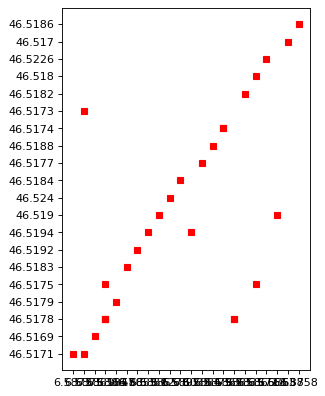

In [ ]:
fig = plt.figure(figsize=(4, 6), dpi=80)
#print(df['lat'].fillna(value="0").values, df['lng'].fillna(value="0").values)

plt.plot(df['lng'].dropna().values, df['lat'].dropna().values, 'rs')

In [ ]:
!pip install mplleaflet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for mplleaflet: filename=mplleaflet-0.0.5-py3-none-any.whl size=28582 sha256=64d514ee02b0135fc8bed1442dae3e07543df2cbf66e4d3ac5cb30e33c13a240
  Stored in directory: /root/.cache/pip/wheels/6b/f5/21/cdd12e476182b4b0b98326cdb9efa02ddbd5d87ca5de051c84
Successfully built mplleaflet


In [ ]:
mplleaflet.display(fig=fig)
#mplleaflet.show()

/usr/local/lib/python3.7/dist-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


## References and Links

- Learn [Python the hard way](https://learnpythonthehardway.org/book/)
- [Web scraper in python](https://first-web-scraper.readthedocs.io/en/latest/) great and exhaustive tutorial
- [Curl converter](https://curlconverter.com/python/) prepares request in correct format

